# Downloaders

> Downloaders are responsible for downloading evaluation repositories from various sources (e.g. IOM, UNHCR).

In [ ]:
#| default_exp downloaders

In [ ]:
#| export
from pathlib import Path
from fastcore.all import *
from urllib.parse import urlparse
from functools import partial

from iomeval.readers import load_evals, default_config, Evaluation

In [ ]:
#| exports
def download_eval(
    eval:Evaluation, # Evaluation object 
    dst:str='files/test/eval_reports', # Destination path to save files
    cfg:dict=default_config # Configuration dictionary
    ):
    "Download all documents for an evaluation to dst/eval_id/"
    eval_dir = Path(dst)/getattr(eval, cfg.id)
    eval_dir.mkdir(parents=True, exist_ok=True)
    headers = {'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36'}
    for doc in getattr(eval, cfg.docs):
        url = doc[cfg.url]
        fname = Path(urlparse(url).path).name
        dest = eval_dir/fname
        urlsave(url, dest, headers=headers)
    return eval_dir

In [ ]:
#| eval: false
fname = 'files/test/evaluations.json'
evals = load_evals(fname)
evl = evals[0]
evl



### EVALUATION OF IOM’S MIGRATION DATA STRATEGY
**Year:** 2025 | **Organization:** IOM | **Countries:** Worldwide

**Documents:** 2 available  
**ID:** `9992310969aa2f428bc8aba29f865cf3`


In [ ]:
#| eval: false
eval_dir = download_eval(evals[0])
eval_dir.ls()

(#2) [Path('files/test/eval_reports/9992310969aa2f428bc8aba29f865cf3/Annex%20VII%20Case%20Study%20-%20RDH%20Asia-Pacific.pdf'),Path('files/test/eval_reports/9992310969aa2f428bc8aba29f865cf3/Annex%20VI%20Case%20Study%20-%20RDH%20East%2C%20Horn%20and%20Southern%20Africa.pdf')]

In [ ]:
#| eval: false
%ls files/test/eval_reports/*

files/test/eval_reports/2b297bc904ed1e542fbe67f62a8ea7cf:
Meta-Evaluation-Infographics.pdf
Meta-evaluation%202020-2024%20-%20Evaluation%20Brief_0.pdf
Meta-evaluation%202020-2024%20report%20-%20clean.pdf

files/test/eval_reports/8faad6edb0414cfc8f35415a93726e36:
CS1137-CS1138_Evaluation%20Brief_Javier%20SANCHEZ%20MARTI.pdf
CS1137-CS1138_Evaluation%20ToR_Javier%20SANCHEZ%20MARTI.pdf
CS1137-CS1138_Final%20Report_French_Javier%20SANCHEZ%20MARTI.pdf
CS1137-CS1138_Final%20Report_Spanish_Javier%20SANCHEZ%20MARTI.pdf
CS1137-CS1138_Inception%20Report_Javier%20SANCHEZ%20MARTI.pdf
CS1137-CS1138_Management%20Response%20Plan_Javier%20SANCHEZ%20MARTI.pdf

files/test/eval_reports/9992310969aa2f428bc8aba29f865cf3:
Annex%20VI%20Case%20Study%20-%20RDH%20East%2C%20Horn%20and%20Southern%20Africa.pdf
Annex%20VII%20Case%20Study%20-%20RDH%20Asia-Pacific.pdf


In [ ]:
#| exports
def download_evals(
    evals:L, # list of evaluation records 
    dst:str='files/test/eval_reports', # destination path to save documents
    cfg:dict=default_config, # config dictionary
    n_workers:int=4 # number of workers to use
    ):
    "Download all documents for multiple evaluations in parallel"
    if not isinstance(evals, L): evals = L(evals) if isinstance(evals, list) else L([evals])
    return parallel(partial(download_eval, dst=dst, cfg=cfg), evals, n_workers=n_workers, progress=True)

In [ ]:
#| eval: false
eval_dirs = download_evals(evals[:3])
eval_dirs

(#3) [Path('files/test/eval_reports/9992310969aa2f428bc8aba29f865cf3'),Path('files/test/eval_reports/2b297bc904ed1e542fbe67f62a8ea7cf'),Path('files/test/eval_reports/8faad6edb0414cfc8f35415a93726e36')]

In [ ]:
#| eval: false
%ls files/test/eval_reports/*

files/test/eval_reports/2b297bc904ed1e542fbe67f62a8ea7cf:
Meta-Evaluation-Infographics.pdf
Meta-evaluation%202020-2024%20-%20Evaluation%20Brief_0.pdf
Meta-evaluation%202020-2024%20report%20-%20clean.pdf

files/test/eval_reports/8faad6edb0414cfc8f35415a93726e36:
CS1137-CS1138_Evaluation%20Brief_Javier%20SANCHEZ%20MARTI.pdf
CS1137-CS1138_Evaluation%20ToR_Javier%20SANCHEZ%20MARTI.pdf
CS1137-CS1138_Final%20Report_French_Javier%20SANCHEZ%20MARTI.pdf
CS1137-CS1138_Final%20Report_Spanish_Javier%20SANCHEZ%20MARTI.pdf
CS1137-CS1138_Inception%20Report_Javier%20SANCHEZ%20MARTI.pdf
CS1137-CS1138_Management%20Response%20Plan_Javier%20SANCHEZ%20MARTI.pdf

files/test/eval_reports/9992310969aa2f428bc8aba29f865cf3:
Annex%20VI%20Case%20Study%20-%20RDH%20East%2C%20Horn%20and%20Southern%20Africa.pdf
Annex%20VII%20Case%20Study%20-%20RDH%20Asia-Pacific.pdf


I am not seeing the gh-pages when deploying:

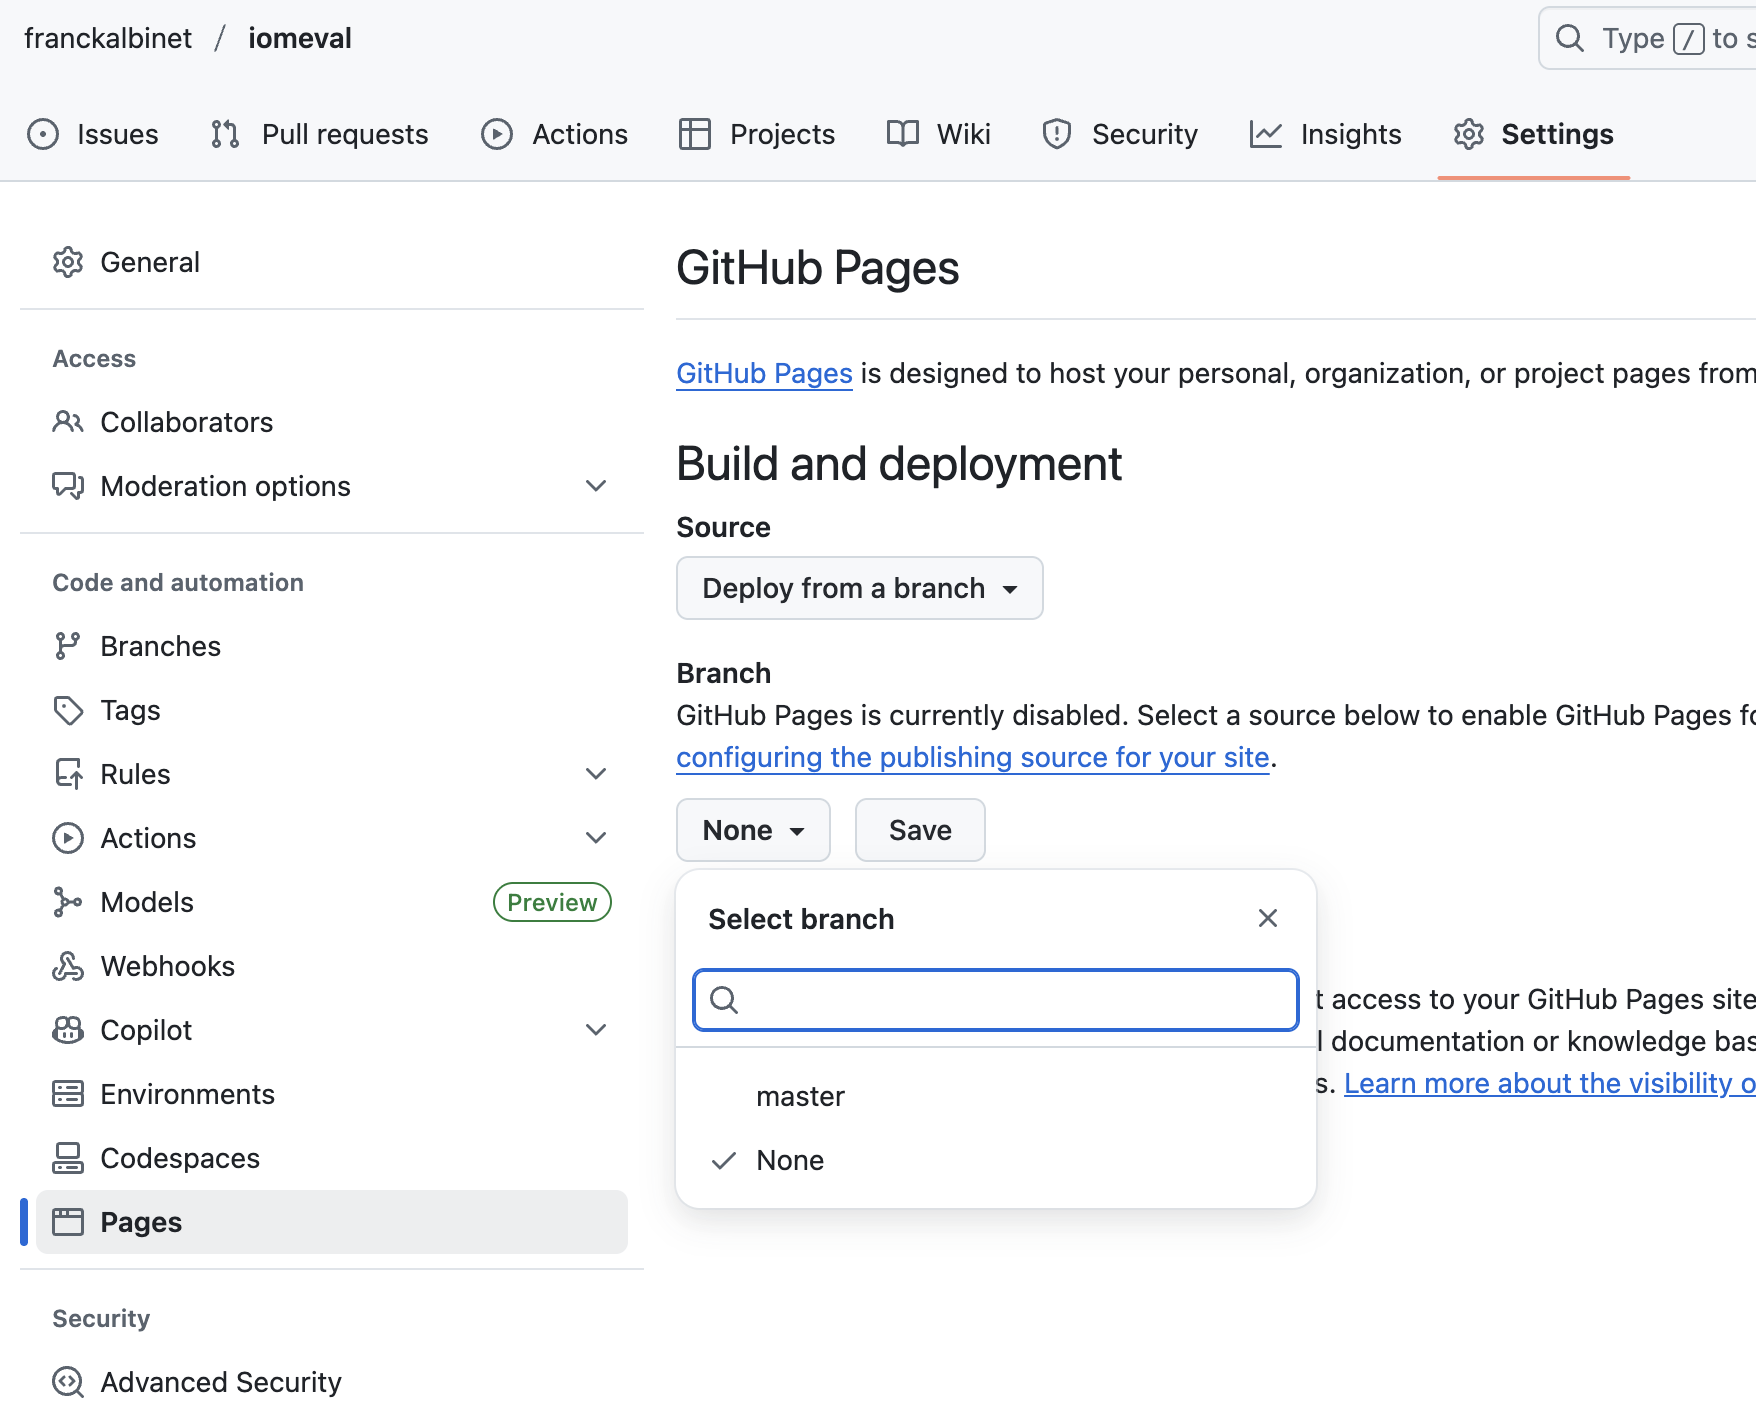

Can you check https://nbdev.fast.ai/tutorials/tutorial.html?

##### 🤖Reply🤖<!-- SOLVEIT_SEPARATOR_7f3a9b2c -->

🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠



<details class='tool-usage-details'>

```json
{
  "id": "toolu_01GPuc1ZvsV5ZQgjCMjzifez",
  "call": {
    "function": "read_url",
    "arguments": {
      "url": "https://nbdev.fast.ai/tutorials/tutorial.html"
    }
  },
  "result": "'[ nbdev ](../index.html)\\n\\n  * [ Get Started](../getting_started.html)\\n  * [ Tutorial](../tutoria<TRUNCATED>"
}
```

</details>

Based on the nbdev documentation, the `gh-pages` branch is created automatically by a GitHub Action the first time you push to the repo. The key instruction is:

"If you don't see a 'gh-pages' branch, wait a few minutes and reload the page. It should automatically be set up for you."

So the issue is that the **Deploy to GitHub Pages** workflow hasn't run yet (or hasn't completed successfully). Here's what to check:

1. **Check GitHub Actions** - Go to the "Actions" tab in your repo. Look for a workflow called "Deploy to GitHub Pages". Has it run? Did it succeed (green check) or fail (red cross)?

2. **Run `nbdev_prepare` and push** - If you haven't pushed any commits after running `nbdev_new`, do:
   ```bash
   nbdev_prepare
   git add .
   git commit -m 'Initial commit'
   git push
   ```

3. **Wait a few minutes** - The `gh-pages` branch is created by the GitHub Action, not by `nbdev_new` directly. After pushing, wait for the "Deploy to GitHub Pages" action to complete successfully.

Once the action succeeds, refresh the Pages settings and you should see `gh-pages` in the branch dropdown.

Would you like me to help troubleshoot the GitHub Actions if they're failing?